In [1]:
## isolation forest
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json, as_json  # for json files
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import numpy as np


In [2]:
data = pd.read_csv("data_sample.csv")


In [3]:
data_host = data["host"].map(read_json)

In [4]:
def find_string(string, obj):
    # finds string in object
    return string in obj

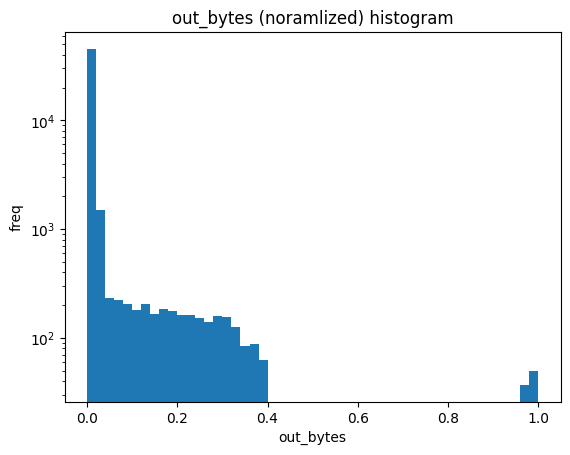

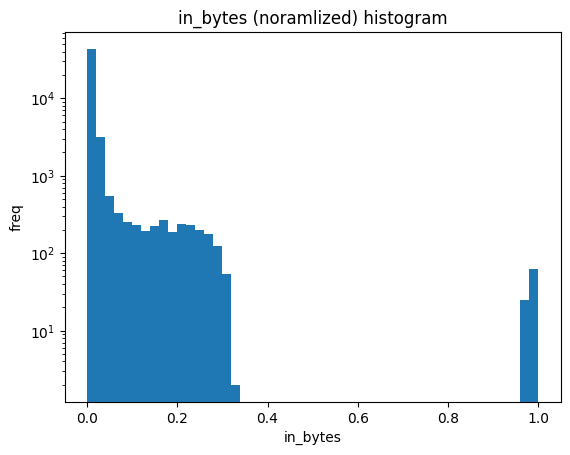

In [85]:
# extract hostnames
hostnames = data["host"].unique()
hostnames = list(map(read_json, hostnames))
hostnames_values = np.array([list(hostnames[i].values()) for i in range(len(hostnames))])
# "network" in data["system"][0]

id_float = data.system.map(lambda x: isinstance(x, float)) # same as is nan
id_string = data.system.map(lambda x: isinstance(x, str))  # shoudl be ~id_string
id_nan = data.system.isna()

id_network = data.loc[id_string]["event"].map(lambda x: "network" in x)
# get network values
network_values = data.loc[id_string][id_network]["system"].map(lambda x: as_json(x))
#out_bytes = 
out_bytes = network_values.map(lambda x: x["network"]["out"]["bytes"])
in_bytes  = network_values.map(lambda x: x["network"]["in"]["bytes"])

# out_bytes.min() debería ser 0, así que no se toma en cuenta
out_bytes_norm = out_bytes/out_bytes.max()
in_bytes_norm = in_bytes/in_bytes.max()

fig, ax = plt.subplots()
plt.title("out_bytes (noramlized) histogram")
ax.hist(x=out_bytes_norm, bins=50)
ax.set_yscale("log")
ax.set_xlabel("out_bytes")
ax.set_ylabel("freq")
plt.show()

fig, ax = plt.subplots()
plt.title("in_bytes (noramlized) histogram")
ax.hist(x=in_bytes_norm, bins=50)
ax.set_yscale("log")
ax.set_xlabel("in_bytes")
ax.set_ylabel("freq")
plt.show()

